<a href="https://colab.research.google.com/github/srikanthe1997/Linear-Regression/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRIP : The sparks foundation

Data science and Business Analytics intern

Author : Srikanth E

Task 1 : Prediction using Supervised ML

In this task we have to predict the percentage score of a student based on the number of hours studied.The task has two variables where the feature is the no. of hours studied and the target value in the oercentage score. this can solved using simple linear regression.

**STEP 1 - Importing the dataset**

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data from remote link

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df =pd.read_csv(url)

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
# to find the number of columns and rows
df.shape

(25, 2)

In [ ]:
# to find more info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**STEP 2 - Visualizing the dataset**

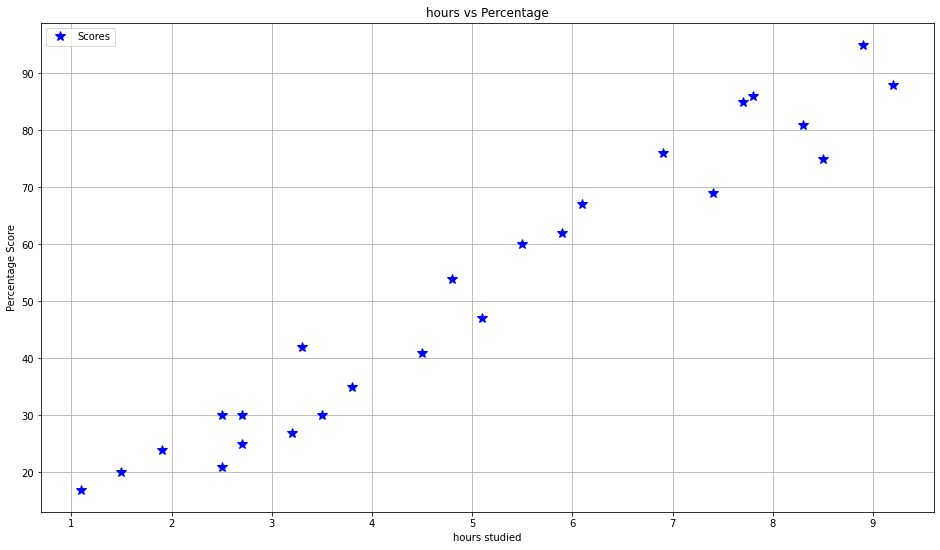

In [ ]:
#Plotting the dataset
plt.rcParams["figure.figsize"] = [16,9]
df.plot(x='Hours', y='Scores', style='*', color='blue', markersize=10)
plt.title('hours vs Percentage')
plt.xlabel('hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

From the graph above . we can observe that ther eis a linear relation between "hours studied" and "percentage score".So, we can use the linear regression supervised machine model on it to predict further values.

**STEP 3 - Data preparation**

In this step we will divide the data into "features" and "label".After that we will split the whole dataset into 2 parts- testing data and training data.

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
x = df.iloc[:, :1].values
y = df.iloc[:, 1:].values

In [ ]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [ ]:
# Splitting data into training and testing data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                     test_size=0.2, random_state=0)


**STEP 4 - Training the algorithm**

we have split our data into training and testing sets, and now we will train our model

In [ ]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**STEP 5 - Visualizing the model**

After training the model,now its time to visualize it.



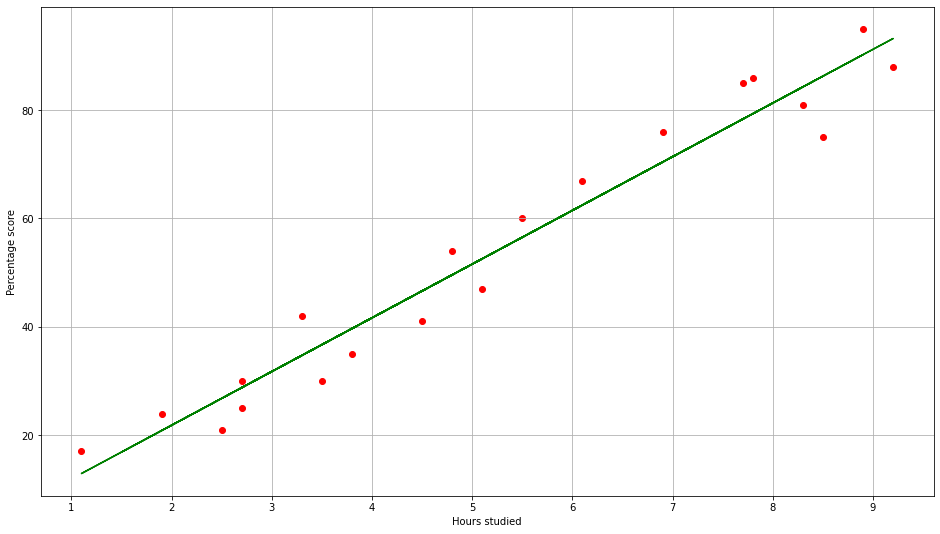

In [ ]:
line = model.coef_*x +model.intercept_

#Plotting for the training set
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(x_train,y_train, color ='red')
plt.plot(x,line, color='green')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.grid()
plt.show()

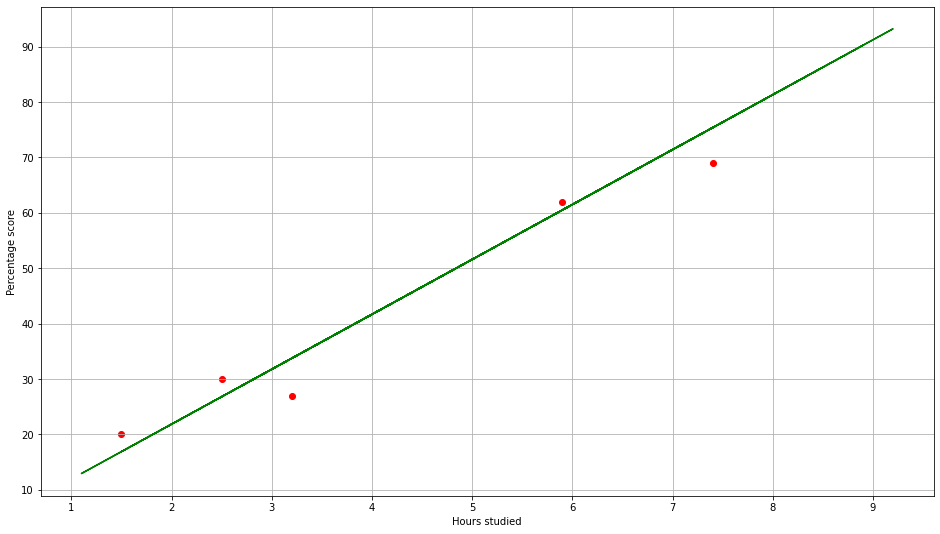

In [ ]:
#Plotting for the testing data
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(x_test,y_test, color ='red')
plt.plot(x,line, color='green')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.grid()
plt.show()

**STEP 6 - Making Predictions**

Now that we have trained our algorithm ,its time to make some predictions

In [ ]:
print(x_test) # Testing data - in hours
y_pred = model.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# comparing actual vs prdicted

y_test

array([[20],
       [27],
       [69],
       [30],
       [62]])

In [ ]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [ ]:
#testing with our own data

hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is ",own_pred[0])

The predicted score if a person studies for 9.25 hours is  [93.69173249]


**Hence,it can be concluded that the predicted score if a person studies for 9.25 hours is 93.69173249**


**STEP 7- Evaluating the model**

In the last step ,we are going to evaluate our trained model by calculating mean absolute error

In [ ]:
from sklearn import metrics
print ("Mean absolute error :", metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error : 4.183859899002982
